# Case Study on Autoregression

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Reading the Data

Let's look at a dataset that describes the minimum daily temperatures over 10 years (1981-1990) in the city of Melbourne, Australia.

The units are in degrees Celsius and there are 3,650 observations. The source of the data is the Australian Bureau of Meteorology.

Note: This dataset ignores a day in leap years for consistent number of observations (365) in each year.

In [2]:
df  = pd.read_csv("daily-min-temp-melb.csv", index_col=0, parse_dates=True) 

# fill in missing values
idx = pd.date_range('1981-01-01', '1990-12-31')
df = df.reindex(idx)
df.fillna(method='backfill',inplace=True)

df.tail()

,min_temp
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


In [3]:
len(df)

3652

## Visualizing Data

Let's visualize what the minimum daily temperature data looks like. Alongside with it, we also plot the rolling mean to smooth out variations in each 365-day window. <br>

**NOTE:** The rolling mean appears to start high and then stabilize after about 365 days because in the first year, it just averages the observations it does have in that window ($\leq$365). This makes the rolling mean higher for that period since the temperates are higher early on.

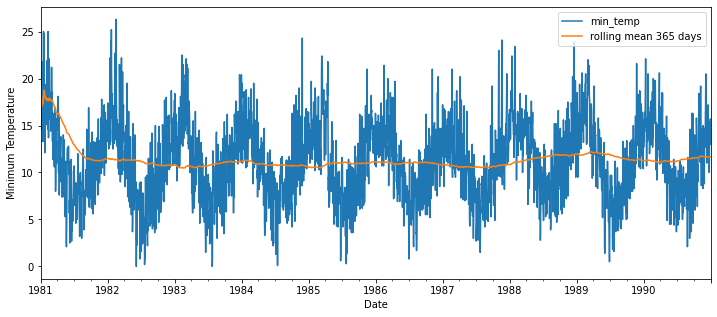

In [4]:
# Plotting the original data and the 365 day rolling mean
ax = df.plot(figsize=(12,5));

df.min_temp.rolling("365d").mean().plot(ax=ax, label='rolling mean 365 days')
# df.min_temp.rolling("7d").mean().plot(ax=ax, label='rolling mean 365 days')
ax.set_ylabel("Minimum Temperature")
ax.set_xlabel("Date")
ax.legend();

Autoregression relies on the relationship between a value at a particular time step (say, t), and the values at earlier time steps (t-1, t-2, and so on) or **lags**. Using a lag plot, we can visualize how the previous time step relates with the current one.

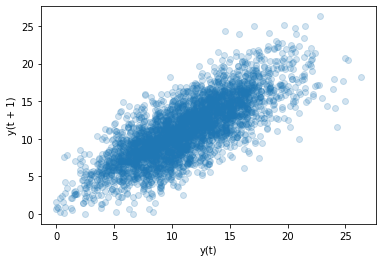

In [5]:
from pandas.plotting import lag_plot

# Visualizing the lag plot.
# By default lag=1
lag_plot(df.min_temp, alpha=0.2);

We can visualize lag plot at higher lags as well!

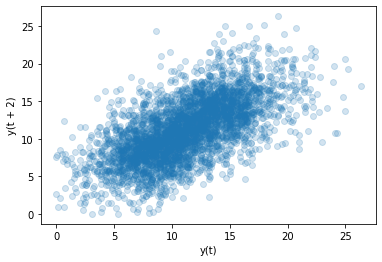

In [6]:
lag_plot(df.min_temp, lag=2, alpha=0.2);

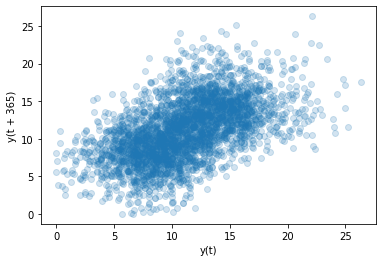

In [7]:
lag_plot(df.min_temp, lag=365, alpha=0.2);

We see that while the lag plot at lag=1 does indicate a somewhat linear relationship between minimum temperature values at time steps t, and t-1 (or alternatively at t+1 and t, whichever way you want to look at it!). However, this relation becomes weaker as lags increase.

## Autoregression Model

We will now use a simple Autoregression model for the task of forecasting ahead.
We have minimum-temperature data for 10 years, so let's say we want to predict the last 7 days of this 10-year period using the other observations before it (3650-7 = 3643)

In [8]:
# Defining the train set, all days but the last 7: 1981-01-01 to 1990-12-24
dftrain = df.loc[:'1990-12-24']
dftrain.tail()

,min_temp
1990-12-20,15.4
1990-12-21,13.1
1990-12-22,13.2
1990-12-23,13.9
1990-12-24,10.0


In [9]:
# The test set: The last 7 days: 1990-12-25 to 1990-12-31
dftest = df.loc['1990-12-25':]
dftest

,min_temp
1990-12-25,12.9
1990-12-26,14.6
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


**Note:** The `statsmodels` library has autoregression models, but the syntax is slightly different from that of `sklearn` .<br>
* While defining the model object, we pass in the time-series we want to forecast (Instead of during fitting)
* The `.fit()` function takes in the `maxlag` argument (Instead of the doing this during object declaration)

In [10]:
from statsmodels.tsa.ar_model import AR
from datetime import datetime

model = AR(dftrain.min_temp)
model_fit = model.fit(maxlag=1)

print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

yhat = model_fit.predict(start='1990-12-25', end='1990-12-31')

Lag: 1
Coefficients: const          2.518687
L1.min_temp    0.774337
dtype: float64


### Visualizing our predictions

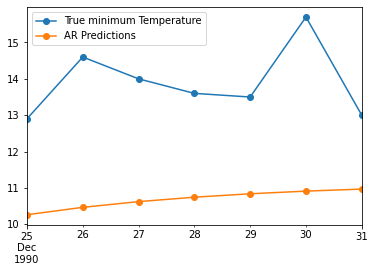

In [11]:
# add predictions to the test dataframe
dftest["predictions"] = yhat

ax = dftest.min_temp.plot(marker='o', label="True minimum Temperature")
dftest.predictions.plot(ax=ax, marker='o', label='AR Predictions');
ax.legend();

We can now check if our predictions improve if we consider more time lags of observations for Autoregression. (Check by setting maxlag=2, 3, 365 etc.)

## In-Class Quiz

### Question 1
> In this question, you task is to fit an AR model using the same dataset and training data as before (1981-01-01 to 1990-12-24). Then, you have to forecast for the period of same testing data (1990-12-25 to 1990-12-31) choosing a value of `maxlag` that corresponds to using a maximum of `5` past observations. **Find the "Mean squared error" between the predicted values and the true minimum temperature values for the testing period.**. Report your answer rounded to 2 decimal places.
>
> **Hint:** See the starter code below!

In [ ]:
# Given code
from sklearn.metrics import mean_squared_error

# dftrain and dftest are the same as the code above

In [ ]:
# Your code here (retrain using maxlag=5 and then use mean_squared_error)


### Question 2
> In the case study, we forecasted minimum temperature values for 7 days (1990-12-25 to 1990-12-31) ahead from the last date in the training period (1981-01-01 to 1990-12-24). Suppose you want to get predictions on the **5th of January 1991** using a `maxlag=365` and the whole dataset. What value of minimum temperature is predicted using this AR model? Report your answer rounded to 2 decimal places.
>
> **Hint:** The "start" and "end" parameters in the .predict() method might be useful. The "start" parameter should be the end of the training set.

In [ ]:
# Use all the data for training
dftrain = df

In [ ]:
# Your code here (retrain using maxlag=365 and then predict Jan 5, 1991 by selecting "start" and "end")

